In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('train.csv')

# Kaggle test dataset. Though it wont be used to evaluate the model, I need this to keep the features in-sync, and for generating the final kaggle submission file
test = pd.read_csv('test.csv')

#save ids for submission file
ids = test["Id"]

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [91]:
#Drop columns that are not required for predictions.
df.drop('Id', axis=1, inplace=True)

test.drop('Id', axis=1, inplace=True)

In [92]:
# As the number of columns are more (80), disable the max_rows display option to view all rows
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [93]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

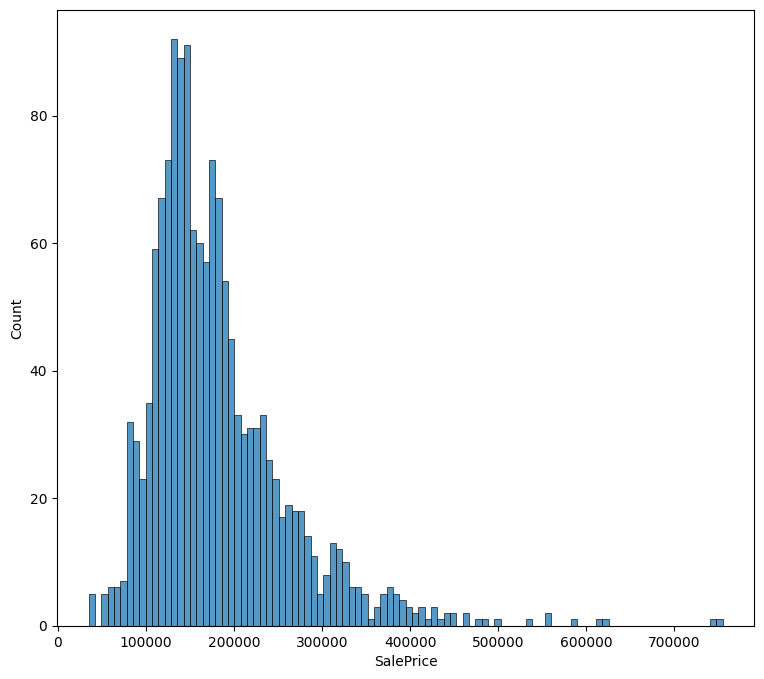

In [94]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))

sns.histplot(df['SalePrice'], bins=100)

# Data Preprocessing

In [95]:
# Identify columns with 80% same value, so that we can delete them
for col in df.columns:
  nonRepCols = True
  count = df['HalfBath'].value_counts().sort_values(ascending=False)
  top_value_count = count.iloc[0]
  if top_value_count * 100 / len(df) > 80:
    nonRepCols = False
    print(col)

if nonRepCols:
  print("None of the columns have the same value repeated more than 80%")

None of the columns have the same value repeated more than 80%


Let us proprocess the numerical features first.

In [96]:
# Find NaN in numerical columns for training dataset
df.select_dtypes(include=['float64','int64']).isna().sum()
#df.columns[df.isna().any()].tolist()

#df.columns[df.select_dtypes(include=['float64','int64']).isna().sum()]

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [97]:
# Find NaN in numerical columns in test dataset
test.select_dtypes(include=['float64','int64']).isna().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

LotFrontage, GarageYrBlt and MasVnrArea are the only three numerical features with null values in the training dataset.

LotFrontage, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageYrBelt, GarageCars, GarageArea are the numerical features with null values in the testing dataset.

In [98]:
# Analysis on LotFrontage
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [99]:
# Replace the 'LotFrontage' and 'MasVnrArea' null values with the mean in the dataframe
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].mean(), inplace=True)

# for the test only
test['BsmtFinSF1'].fillna(test['LotFrontage'].mean(), inplace=True)
test['BsmtFinSF2'].fillna(test['MasVnrArea'].mean(), inplace=True)
test['BsmtUnfSF'].fillna(test['LotFrontage'].mean(), inplace=True)
test['TotalBsmtSF'].fillna(test['MasVnrArea'].mean(), inplace=True)
test['BsmtFullBath'].fillna(test['LotFrontage'].mean(), inplace=True)
test['BsmtHalfBath'].fillna(test['MasVnrArea'].mean(), inplace=True)
test['GarageCars'].fillna(test['LotFrontage'].mean(), inplace=True)
test['GarageArea'].fillna(test['MasVnrArea'].mean(), inplace=True)

In [100]:
# Analysis on GarageYrBlt

# As YearBuilt and GarageYrBlt looks similar, let us find the correlation between the two.
print(df['YearBuilt'].corr(df['GarageYrBlt']))

0.825667484174342


As YearBuilt and GarageYrBlt are highly correlated, we can drop one of those. Let us drop GarageYrBlt as it has some null values.

In [101]:
# drop columns from both train and test datasets
df.drop('GarageYrBlt', axis=1, inplace=True)

test.drop('GarageYrBlt', axis=1, inplace=True)

Let us process non-numerical fields next

In [102]:
# Find NaN in non-numerical columns for test
print(test.shape)
test.select_dtypes(exclude= ['float64','int64']).isna().sum()

(1459, 78)


MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In the test file, MSZoning, Utilities, Exterior1st, Exterior2nd, KitchenQual, Functional, SaleType have null values.

In [103]:
# Find NaN in non-numerical columns
print(df.shape)
df.select_dtypes(exclude= ['float64','int64']).isna().sum()

(1460, 79)


MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

Alley, PoolQC, Fence and MiscFeature have null values in the maximum number of rows. Let us drop these columns as they are not providing any value.

In [104]:
# drop columns from both train and test datasets
df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

test.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

For the other non-numerical columns that have null values, let us replace the nulls with the mode of the column.

In [105]:
for column in ['MasVnrType','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Electrical','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']:
  df[column].fillna(df[column].mode()[0], inplace=True)
  test[column].fillna(test[column].mode()[0], inplace=True)

In [106]:
for column in ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']:
  test[column].fillna(test[column].mode()[0], inplace=True)

In [107]:
# Verify the dataset for any null values after the proprocessing
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [108]:
test.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

Let us label encode the non-numerical columns

In [109]:
df.select_dtypes(exclude= ['float64','int64']).describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,906,1282,647,686,1348,991,467,1294,1428,741,1365,1335,735,1360,1070,951,686,1392,1407,1340,1267,1198


In [110]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

columns = ["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical","KitchenQual","Functional","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PavedDrive","SaleType","SaleCondition"]

# Fit the lebel encoder on all columns

for col in columns:
  le.fit(df[col])

  # Apply the encoding to each column
  df[col+'_en'] = le.transform(df[col])

  test[col+'_en'] = le.transform(test[col])


In [111]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_en,Street_en,LotShape_en,LandContour_en,Utilities_en,LotConfig_en,LandSlope_en,Neighborhood_en,Condition1_en,Condition2_en,BldgType_en,HouseStyle_en,RoofStyle_en,RoofMatl_en,Exterior1st_en,Exterior2nd_en,MasVnrType_en,ExterQual_en,ExterCond_en,Foundation_en,BsmtQual_en,BsmtCond_en,BsmtExposure_en,BsmtFinType1_en,BsmtFinType2_en,Heating_en,HeatingQC_en,CentralAir_en,Electrical_en,KitchenQual_en,Functional_en,FireplaceQu_en,GarageType_en,GarageFinish_en,GarageQual_en,GarageCond_en,PavedDrive_en,SaleType_en,SaleCondition_en
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,2,1,1,4,4,2,8,4
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,8,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4


In [112]:
# Drop all the non-encoded columns
columns = ["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical","KitchenQual","Functional","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PavedDrive","SaleType","SaleCondition"]

for col in columns:
  df.drop(col, axis=1, inplace=True)
  test.drop(col, axis=1, inplace=True)

In [113]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_en,Street_en,LotShape_en,LandContour_en,Utilities_en,LotConfig_en,LandSlope_en,Neighborhood_en,Condition1_en,Condition2_en,BldgType_en,HouseStyle_en,RoofStyle_en,RoofMatl_en,Exterior1st_en,Exterior2nd_en,MasVnrType_en,ExterQual_en,ExterCond_en,Foundation_en,BsmtQual_en,BsmtCond_en,BsmtExposure_en,BsmtFinType1_en,BsmtFinType2_en,Heating_en,HeatingQC_en,CentralAir_en,Electrical_en,KitchenQual_en,Functional_en,FireplaceQu_en,GarageType_en,GarageFinish_en,GarageQual_en,GarageCond_en,PavedDrive_en,SaleType_en,SaleCondition_en
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,2,1,1,4,4,2,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4


In [114]:
# rename the "_en" columns to retain the original column names
df.columns = df.columns.str.replace('_en', '')
test.columns = test.columns.str.replace('_en', '')

In [115]:
# Sort the columns so that train and test are both in the same order

df = df.reindex(sorted(df.columns), axis = 1)

test = test.reindex(sorted(test.columns), axis = 1)

In [116]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,0,3,3,706,0,2,5,1,0,2,150,1,2,2,4,0,4,2,12,13,2,0,2,2,6,548,2,4,1,4,1,1710,1,1,0,5,1,2,3,0,8450,4,65.0,3,0,60,3,196.0,1,0,2,5,61,5,7,2,0,1,1,4,8,0,1,8,856,0,0,2003,2003,2008
1,1262,0,0,3,0,3,1,978,0,0,5,0,1,2,284,1,1,2,4,0,4,3,8,8,4,1,1,2,6,460,2,4,1,4,1,1262,0,1,0,2,1,3,3,0,9600,2,80.0,3,0,20,3,0.0,2,0,5,24,0,8,6,2,0,1,1,4,8,0,1,6,1262,0,298,1976,1976,2007
2,920,866,0,3,0,3,2,486,0,2,5,1,0,2,434,1,2,2,4,0,4,2,12,13,4,1,2,2,6,608,2,4,1,4,1,1786,1,1,0,5,1,2,3,0,11250,4,68.0,0,0,60,3,162.0,1,0,9,5,42,5,7,2,0,1,1,4,8,0,1,6,920,0,0,2001,2002,2008
3,961,756,0,3,0,1,3,216,0,0,5,1,0,3,540,1,2,2,4,272,4,3,13,15,2,1,0,1,6,642,3,4,2,4,5,1717,0,1,2,5,1,2,3,0,9550,0,60.0,0,0,70,3,0.0,2,0,2,6,35,5,7,2,0,1,1,0,8,0,1,7,756,0,0,1915,1970,2006
4,1145,1053,0,4,0,3,0,655,0,2,5,1,0,2,490,1,2,2,4,0,4,2,12,13,4,1,2,2,6,836,3,4,1,4,1,2198,1,1,0,5,1,2,3,0,14260,2,84.0,0,0,60,3,350.0,1,0,12,15,84,5,8,2,0,1,1,4,8,0,1,9,1145,0,192,2000,2000,2008


# Model Training

In [119]:
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [120]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor()

model_rf.fit(X,y)

# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700]}

# try out every combination of the above values
search = GridSearchCV(model_rf, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters for random forest are ",search.best_params_)

The best hyperparameters for random forest are  {'max_depth': 6, 'n_estimators': 700}


In [121]:
# Random Forest Continued

# Use the best hyperparameters
model_rf=RandomForestRegressor(n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"])

model_rf.fit(X_train, y_train)

predictions_train_rf = model_rf.predict(X_test)

In [122]:
# Fitting Random Forest Regression to the dataset
#model_rf = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)

# Fit the regressor with x and y data
#model_rf.fit(X_train, y_train)

In [124]:
# Evaluating the Random Forest model

RMSLE_rf = np.sqrt( mean_squared_log_error(y_test, predictions_train_rf) )
print("The RMSE score is %.5f (XGB)" % RMSLE_rf )

r2 = r2_score(y_test, predictions_train_rf)
print(f'R-squared: {r2}')

The RMSE score is 0.17357 (XGB)
R-squared: 0.8904765209166006


In [125]:
# Kaggle submission using Random Forest
predictions_kg_rf = model_rf.predict(test)

submission = pd.DataFrame({"Id": ids, "SalePrice": predictions_kg_rf})
submission.to_csv('submission.csv', index=False)

In [130]:
# XGBoost Regressor
from xgboost import XGBRegressor

model_xgb = XGBRegressor(eval_metric='rmsle')

model_xgb.fit(X,y)

# set up our search grid
param_grid = {"max_depth":    [5, 6, 7],
              "n_estimators": [600, 700, 1000],
              "learning_rate": [0.01, 0.015, 0.02]}

# try out every combination of the above values
search = GridSearchCV(model_xgb, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 1000}


In [131]:
# XGBoost Continued

# Use the best hyperparameters
model_xgb=XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

model_xgb.fit(X_train, y_train)

predictions_train_xgb = model_xgb.predict(X_test)

In [132]:
# Kaggle submission using XGBoost
predictions_kg_xgb = model_xgb.predict(test)

submission_xgb = pd.DataFrame({"Id": ids, "SalePrice": predictions_kg_xgb})
submission_xgb.to_csv('submission_xgb.csv', index=False)

# The kaggle submission using the above XGBoost model was the best.

In [133]:
# Evaluating the XGBoost model

RMSLE_xgb = np.sqrt( mean_squared_log_error(y_test, predictions_train_xgb) )
print("The RMSE score is %.5f (XGB)" % RMSLE_xgb )

mse_xgb = mean_squared_error(y_test, predictions_train_xgb)
print(f'Mean Squared Error (XGB): {mse_xgb}')

r2_xgb = r2_score(y_test, predictions_train_xgb)
print(f'R-squared (XGB): {r2_xgb}')

The RMSE score is 0.13903 (XGB)
Mean Squared Error (XGB): 494363931.20106107
R-squared (XGB): 0.9307642906080762
